Group Project Proposal

Title:  Classification using Dry Bean Data Set of 7 Bean Types

Introduction:

For the group project, we will be working with the Dry Bean Dataset. This dataset contains information on 7 different Dry beans. Images of over 13,000 grains were taken by a high-resolution camera. Based on these images, data was recorded for 16 features such as area, perimeter, aspect ration, etc. For our proposal, we will be attempting to classifying new grains into one of the seven dry bean categories.

Preliminary exploratory data analysis:

In [20]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(readxl)
library(gridExtra)
library(RColorBrewer)
require(gridExtra)
options(repr.matrix.max..rows = 6)
set.seed(99999)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [21]:

url <- "https://github.com/Adrianna-Nimmons/dsci-100-project-group51/raw/main/beans.xlsx"
download.file(url, "beans.xlsx")
beans_data <- read_excel("beans.xlsx")
beans_data <- mutate(beans_data, Class = as_factor(Class))

beans_split <- initial_split(beans_data, prop = 0.75, strata = Class)
beans_training <- training(beans_split)
beans_testing <- testing(beans_split)

new_table_1<- beans_training |>
            group_by(Class)|>
            # summarize(count=n())
             summarize(Mean_Shape_Factor_1 = mean(ShapeFactor1), Mean_Shape_Factor_2 = mean(ShapeFactor2),Mean_Equivalent_Diameter = mean(EquivDiameter), Mean_Minor_Axis_Length = mean(MinorAxisLength), Mean_Convex_Area = mean(ConvexArea), Mean_Roundness = mean(roundness),count=n())
new_table_1


Class,Mean_Shape_Factor_1,Mean_Shape_Factor_2,Mean_Equivalent_Diameter,Mean_Minor_Axis_Length,Mean_Convex_Area,Mean_Roundness,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SEKER,0.006336551,0.0025427415,224.8512,201.8332,40233.19,0.9451365,1519
BARBUNYA,0.005356088,0.0013974499,297.1777,240.4068,70952.69,0.8011084,982
BOMBAY,0.003438398,0.0008413027,469.6162,374.7865,176325.08,0.8646603,394
CALI,0.005464965,0.0011067326,309.2667,236.1263,76557.73,0.8457226,1222
HOROZ,0.006998111,0.0010477597,260.9422,184.3833,54522.55,0.7937945,1436
SIRA,0.006715347,0.0016862666,238.3069,190.9101,45257.73,0.8848883,1994
DERMASON,0.007750536,0.0021651493,201.6740,165.7532,32496.29,0.9088095,2659


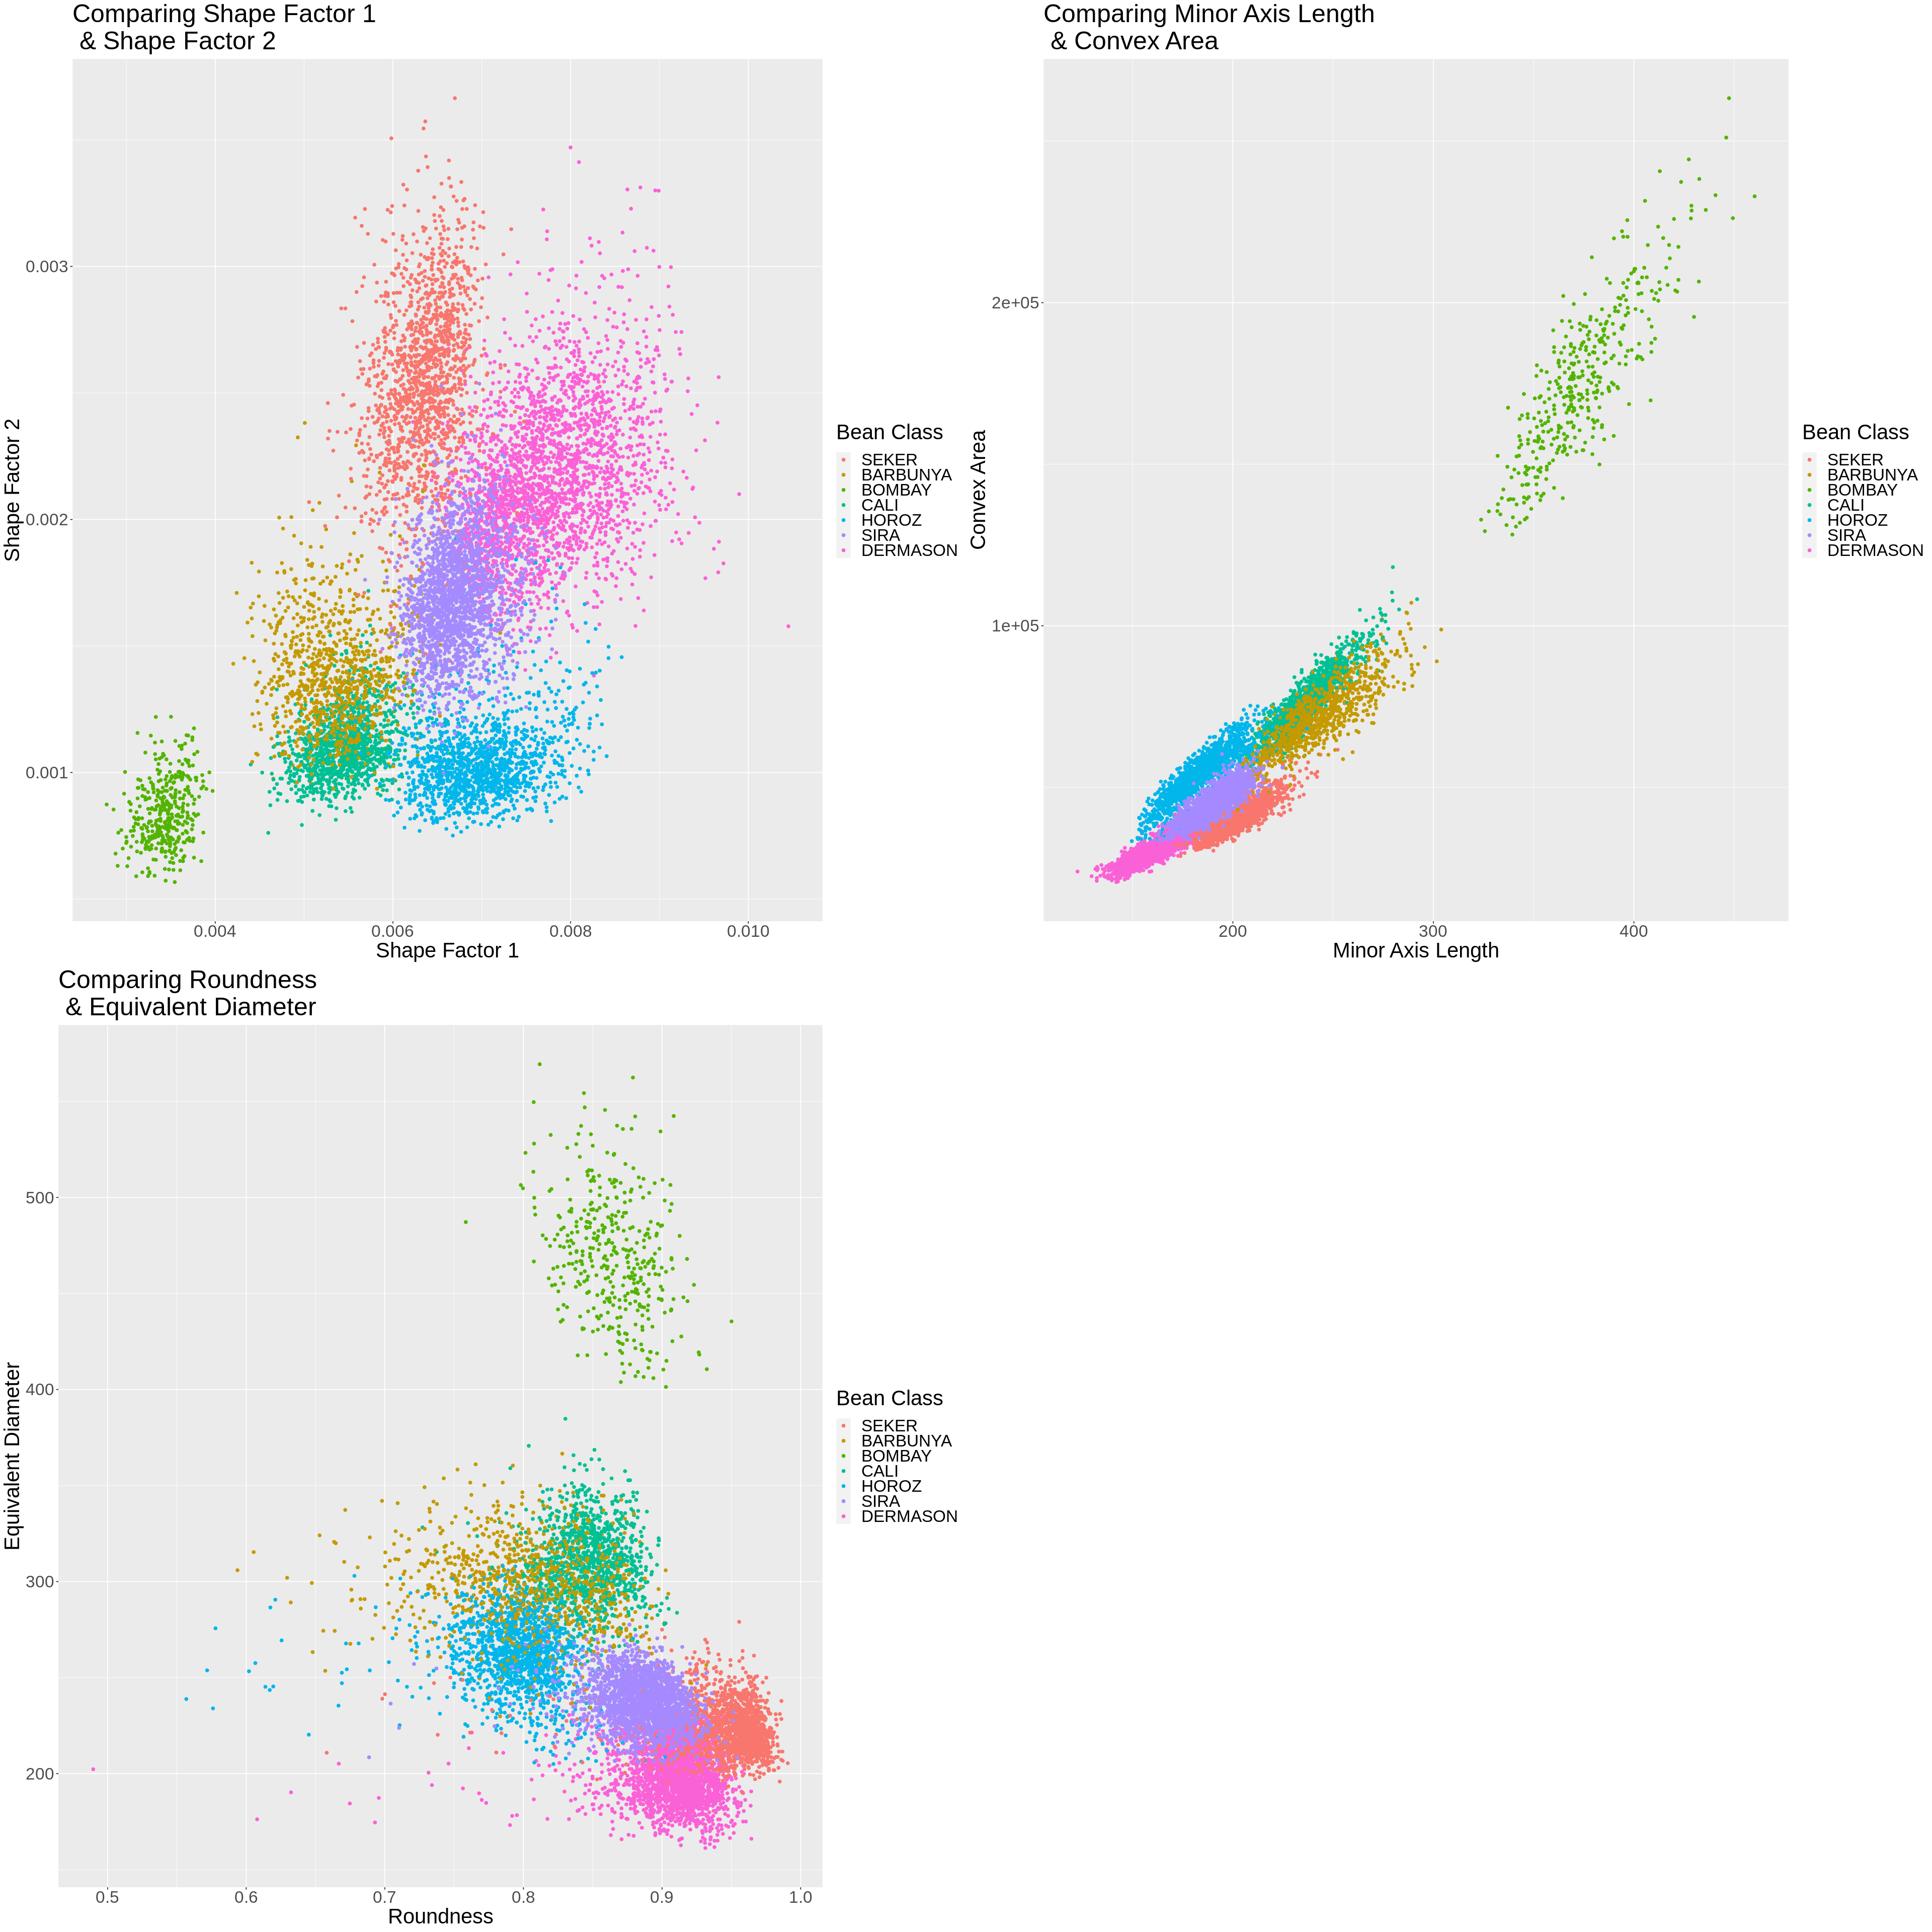

In [30]:
beans_shape_factor_plot <- ggplot(beans_training, aes( x = ShapeFactor1, y = ShapeFactor2, color = Class))+
geom_point() +
labs( x = "Shape Factor 1", y = "Shape Factor 2", color = "Bean Class")+
ggtitle("Comparing Shape Factor 1 \n & Shape Factor 2") +
theme(text = element_text(size = 25))+
scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 30, repr.plot.height = 10)

beans_axsis_area_plot <-ggplot(beans_training, aes( x = MinorAxisLength, y = ConvexArea, color = Class))+
geom_point()+
labs( x = "Minor Axis Length", y = "Convex Area", color = "Bean Class")+
ggtitle("Comparing Minor Axis Length \n & Convex Area") +
theme(text = element_text(size = 25))+
scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 30, repr.plot.height = 10)

beans_roundness_diameter_plot <- ggplot(beans_training, aes( x = roundness, y = EquivDiameter, color = Class))+
geom_point()+
labs( x = "Roundness", y = "Equivalent Diameter", color = "Bean Class")+
ggtitle("Comparing Roundness \n & Equivalent Diameter") +
theme(text = element_text(size = 25))+
scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 32, repr.plot.height = 32)

grid.arrange(beans_shape_factor_plot, beans_axsis_area_plot, beans_roundness_diameter_plot, ncol = 2)

In [23]:
Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist 
in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

ERROR: Error in parse(text = x, srcfile = src): <text>:2:9: unexpected symbol
1: Methods:
2: Explain how
           ^


    Methods:

We will conduct our data analysis using the following variables/columns as predictors: ShapeFactor2,  ShapeFactor1, Minor Axis Length, EquivDiameter, Roundness and ConvexArea. We chose these specific variables as evidence has shown that these features were the most important factors when classifying dry beans using this specific dataset (Khan, et. al, 2023).

We will be using 3 scatterplots with two variables as predictors for each plot. We will be using the colour function to classify the type of dry bean. In total, there will be 7 different colours within each plot that will classify the 7 different dry bean types.



     Expected outcomes and significance:

What do you expect to find?
We expect that the difference in variables will be significant enough such that classification between different types would be possible. 


    What impact could such findings have?

These findings may be useful for people who work in agriculture or food manufacturing companies who work with beans. Being able to classify what type of bean is being collected is important for companies who produce/use products that include beans. 

    What future questions could this lead to?

1. Can we use improve upon this dataset by including more bean types, or would it cause too much crowding such that identification would be difficult?
2. What bean types are most similar or different to one another - could this data be used to analyze evolutionary relationships?


In [ ]:
Please submit your group project proposal. Only one member of your team needs to submit. 

what do you expect to find?

We will find which characteristics best fit the 7 different type of dry beans in order to catorgize them. We expect that each type of bean will have significant differences in features when compared to the other bean types that will allow identification of the bean type. 

ShapeFactor2, Minor Axis Length, and ShapeFactor1 along with EquivDiameter, Roundness and ConvexArea